# Gradient Descending

eta_large

In [ ]:
import numpy as np
def E(w):
  return 3*(w-2)**2+5

def dE(w):
  return 6*(w-2)

eta=0.4
w=np.zeros((11,1))
w[0]=5
print('w(0)=%f' %(w[0]), 'E(w(0))=%f' %(E(w[0])))
for i in range(0,10):
  w[i+1]=w[i] - eta*dE(w[i])
  print('w(%d)=%f' %(i+1,w[i+1]), 'E(w(%d))=%f' %(i+1,E(w[i+1])))



w(0)=5.000000 E(w(0))=32.000000
w(1)=-2.200000 E(w(1))=57.920000
w(2)=7.880000 E(w(2))=108.723200
w(3)=-6.232000 E(w(3))=208.297472
w(4)=13.524800 E(w(4))=403.463045
w(5)=-14.134720 E(w(5))=785.987568
w(6)=24.588608 E(w(6))=1535.735634
w(7)=-29.624051 E(w(7))=3005.241843
w(8)=46.273672 E(w(8))=5885.474012
w(9)=-59.983140 E(w(9))=11530.729064
w(10)=88.776396 E(w(10))=22595.428965


eta_small

In [ ]:
eta=0.01
w=np.zeros((11,1))
w[0]=5
print('w(0)=%f' %(w[0]), 'E(w(0))=%f' %(E(w[0])))
for i in range(0,10):
  w[i+1]=w[i] - eta*dE(w[i])
  print('w(%d)=%f' %(i+1,w[i+1]), 'E(w(%d))=%f' %(i+1,E(w[i+1])))

w(0)=5.000000 E(w(0))=32.000000
w(1)=4.820000 E(w(1))=28.857200
w(2)=4.650800 E(w(2))=26.080222
w(3)=4.491752 E(w(3))=23.626484
w(4)=4.342247 E(w(4))=21.458361
w(5)=4.201712 E(w(5))=19.542608
w(6)=4.069609 E(w(6))=17.849848
w(7)=3.945433 E(w(7))=16.354126
w(8)=3.828707 E(w(8))=15.032506
w(9)=3.718984 E(w(9))=13.864722
w(10)=3.615845 E(w(10))=12.832869


eta

In [ ]:
eta=0.1
w=np.zeros((11,1))
w[0]=5
print('w(0)=%f' %(w[0]), 'E(w(0))=%f' %(E(w[0])))
for i in range(0,10):
  w[i+1]=w[i] - eta*dE(w[i])
  print('w(%d)=%f' %(i+1,w[i+1]), 'E(w(%d))=%f' %(i+1,E(w[i+1])))

w(0)=5.000000 E(w(0))=32.000000
w(1)=3.200000 E(w(1))=9.320000
w(2)=2.480000 E(w(2))=5.691200
w(3)=2.192000 E(w(3))=5.110592
w(4)=2.076800 E(w(4))=5.017695
w(5)=2.030720 E(w(5))=5.002831
w(6)=2.012288 E(w(6))=5.000453
w(7)=2.004915 E(w(7))=5.000072
w(8)=2.001966 E(w(8))=5.000012
w(9)=2.000786 E(w(9))=5.000002
w(10)=2.000315 E(w(10))=5.000000


#MNIST

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
%cd /gdrive/MyDrive/DL101/Week_2/common/

/gdrive/MyDrive/DL101/Week_2/common


In [66]:
import common.functions

In [3]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import *


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [4]:
%cd /gdrive/MyDrive/DL101/Week_2/dataset/

/gdrive/MyDrive/DL101/Week_2/dataset


Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.79545, 0.7973
train acc, test acc | 0.8786333333333334, 0.8828
train acc, test acc | 0.8995333333333333, 0.9013
train acc, test acc | 0.9083166666666667, 0.9098
train acc, test acc | 0.9143833333333333, 0.9172
train acc, test acc | 0.91975, 0.9205
train acc, test acc | 0.9239166666666667, 0.9244
train acc, test acc | 0.9267666666666666, 0.9286
train acc, test acc | 0.93045, 0.9316
train acc, test acc | 0.9328333333333333, 0.9324
train acc, test acc | 0.9366333333333333, 0.9359
train acc, test acc | 0.939, 0.9391
train acc, test acc | 0.9413166666666667, 0.9417
train acc, test acc | 0.9431666666666667, 0.9411
train acc, test acc | 0.94555, 0.9

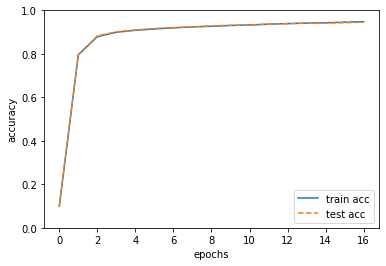

In [5]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

#Backpropagation

In [6]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y                
        out = x * y

        return out

    def backward(self, dout):
        dx = dout * self.y  # x와 y를 바꾼다.
        dy = dout * self.x

        return dx, dy


class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y

        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1

        return dx, dy

In [ ]:
# coding: utf-8
from layer_naive import *

apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3)
price = mul_tax_layer.forward(all_price, tax)  # (4)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dOrange:", dorange)
print("dOrange_num:", int(dorange_num))
print("dTax:", dtax)

## 기울기 확인

In [7]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 절대 오차의 평균을 구한다.
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:1.9155851178295295e-10
b1:9.80165317613637e-10
W2:6.959394507469185e-08
b2:1.3808394246916933e-07


## BackPropagation을 이용한 학습

In [9]:
import sys, os
sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.09871666666666666 0.098
0.7829166666666667 0.7884
0.8769166666666667 0.8805
0.897 0.9007
0.90735 0.9107
0.9147833333333333 0.9159
0.9199666666666667 0.921
0.9237833333333333 0.9238
0.92675 0.9268
0.9289166666666666 0.9296
0.933 0.9328
0.9358666666666666 0.9365
0.9387833333333333 0.9368
0.9407166666666666 0.9385
0.9434166666666667 0.9413
0.9447 0.9434
0.9463333333333334 0.9449


# Optimizer

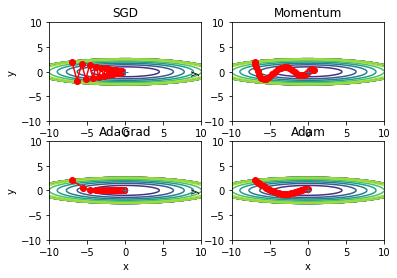

In [11]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

## Comparing Optimizer for MNIST

===========iteration:0===========
SGD:2.3657368741585603
Momentum:2.4019691591768844
AdaGrad:2.2676163300249126
Adam:2.211086673366304
===========iteration:100===========
SGD:1.5006871318413837
Momentum:0.3519339583558813
AdaGrad:0.14396200891625854
Adam:0.2846293214834938
===========iteration:200===========
SGD:0.7325831611832678
Momentum:0.31127592178434343
AdaGrad:0.1799801918873492
Adam:0.21389538845554
===========iteration:300===========
SGD:0.6191596973949536
Momentum:0.27169796807347096
AdaGrad:0.08768326112924692
Adam:0.15330244344349164
===========iteration:400===========
SGD:0.4929198321679088
Momentum:0.207795121085259
AdaGrad:0.09438105531278945
Adam:0.17202726966639093
===========iteration:500===========
SGD:0.4619489438656457
Momentum:0.25017331760485245
AdaGrad:0.1346354535068133
Adam:0.17085765931793484
===========iteration:600===========
SGD:0.4322255647308962
Momentum:0.1942385202217189
AdaGrad:0.07234074886801682
Adam:0.13658479778347182
===========iteration:700=====

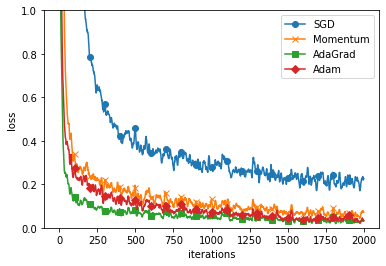

In [12]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

# Weights Initialization

## sigmoid, std=1

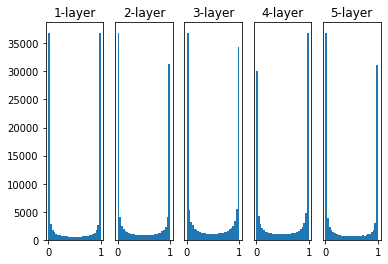

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

## sigmoid, std=0.01

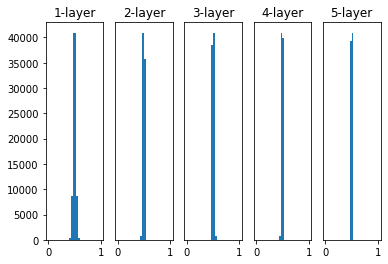

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    #w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

## ReLU, std=1

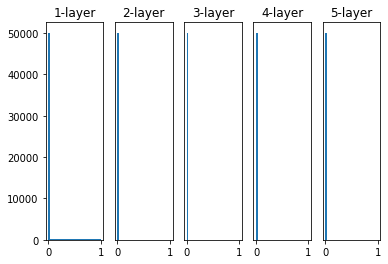

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    #z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

## ReLU, std=0.01

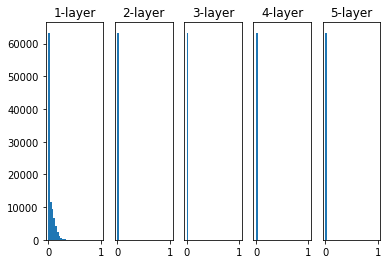

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    #w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

## Xavier, sigmoid

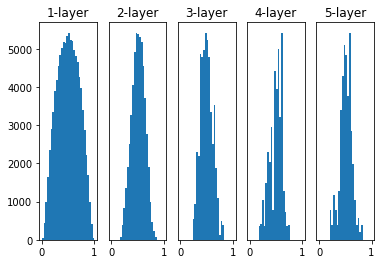

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    #w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

## Xavier, ReLU

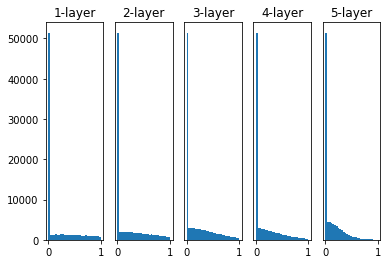

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    #w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    #z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

## He, Sigmoid

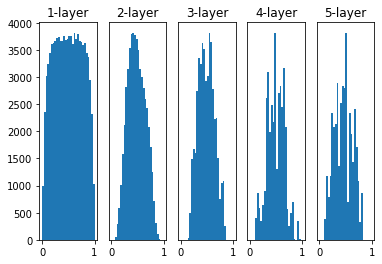

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    #w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    #w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    #z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

## He, ReLU

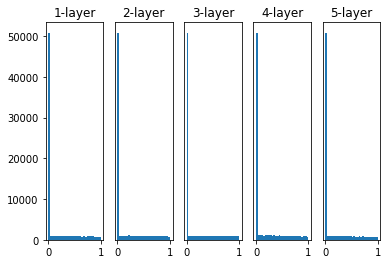

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    #w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    #z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

## Weight Initialization for MNIST

===========iteration:0===========
std=0.01:2.302519090443923
Xavier:2.305656937821977
He:2.4461143514228985
===========iteration:100===========
std=0.01:2.3020832832502736
Xavier:2.2583769154912186
He:1.574435096345239
===========iteration:200===========
std=0.01:2.3021302094724803
Xavier:2.1403275130056896
He:0.7176393205442169
===========iteration:300===========
std=0.01:2.3028965813462774
Xavier:1.8925207203541556
He:0.5463589815054021
===========iteration:400===========
std=0.01:2.3027081222168277
Xavier:1.3581124300592853
He:0.4707476247004109
===========iteration:500===========
std=0.01:2.30237143919856
Xavier:0.878152711035753
He:0.255453591999651
===========iteration:600===========
std=0.01:2.3004902899027244
Xavier:0.7718999830655697
He:0.4186980780762517
===========iteration:700===========
std=0.01:2.303372230605407
Xavier:0.5405520289238694
He:0.3514046753356461
===========iteration:800===========
std=0.01:2.2984864868583497
Xavier:0.449008529528623
He:0.2598634837704784
===

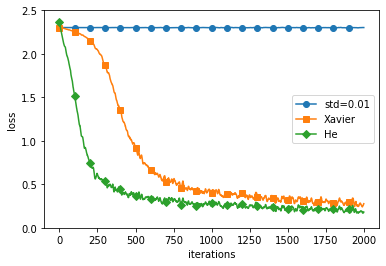

In [13]:
#SGD
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

===========iteration:0===========
std=0.01:2.2995591904416184
Xavier:2.196559581253113
He:2.089887802842763
===========iteration:100===========
std=0.01:0.25310100643043554
Xavier:0.17732646539221633
He:0.20899639473907805
===========iteration:200===========
std=0.01:0.22278397106721148
Xavier:0.17272100009976069
He:0.16220888888609808
===========iteration:300===========
std=0.01:0.07561504072288623
Xavier:0.07064475235757617
He:0.0569944460306271
===========iteration:400===========
std=0.01:0.19529965677782463
Xavier:0.1452067253469387
He:0.13267416474127713
===========iteration:500===========
std=0.01:0.10084753333792373
Xavier:0.06973981479214646
He:0.0565045738405721
===========iteration:600===========
std=0.01:0.14773525096731355
Xavier:0.13735580034319508
He:0.11373960976250586
===========iteration:700===========
std=0.01:0.036950982429779455
Xavier:0.027924300121407793
He:0.024072268747543115
===========iteration:800===========
std=0.01:0.10201943696664312
Xavier:0.0684900722082

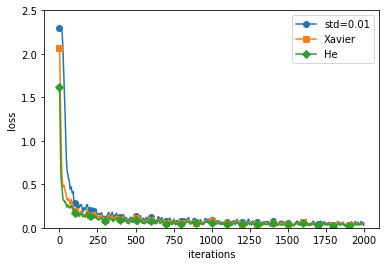

In [14]:
#Adam
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = Adam(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

# Batch Normalization

============== 1/16 ==============
epoch:0 | 0.099 - 0.098


../common/multi_layer_net_extend.py:103: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/multi_layer_net_extend.py:103: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:1 | 0.097 - 0.108
epoch:2 | 0.097 - 0.149
epoch:3 | 0.097 - 0.167
epoch:4 | 0.097 - 0.185
epoch:5 | 0.097 - 0.21
epoch:6 | 0.097 - 0.224
epoch:7 | 0.097 - 0.241
epoch:8 | 0.097 - 0.259
epoch:9 | 0.097 - 0.281
epoch:10 | 0.097 - 0.303
epoch:11 | 0.097 - 0.321
epoch:12 | 0.097 - 0.344
epoch:13 | 0.097 - 0.358
epoch:14 | 0.097 - 0.374
epoch:15 | 0.097 - 0.391
epoch:16 | 0.097 - 0.408
epoch:17 | 0.097 - 0.421
epoch:18 | 0.097 - 0.437


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.448
============== 2/16 ==============
epoch:0 | 0.093 - 0.125


../common/multi_layer_net_extend.py:103: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/multi_layer_net_extend.py:103: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.119
epoch:2 | 0.097 - 0.129
epoch:3 | 0.097 - 0.151
epoch:4 | 0.097 - 0.172
epoch:5 | 0.097 - 0.201
epoch:6 | 0.097 - 0.227
epoch:7 | 0.097 - 0.255
epoch:8 | 0.097 - 0.274
epoch:9 | 0.097 - 0.296
epoch:10 | 0.097 - 0.329
epoch:11 | 0.097 - 0.346
epoch:12 | 0.097 - 0.366
epoch:13 | 0.097 - 0.395
epoch:14 | 0.097 - 0.417
epoch:15 | 0.097 - 0.425
epoch:16 | 0.097 - 0.448
epoch:17 | 0.097 - 0.463
epoch:18 | 0.097 - 0.477


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.498
============== 3/16 ==============
epoch:0 | 0.128 - 0.071
epoch:1 | 0.311 - 0.085
epoch:2 | 0.505 - 0.123
epoch:3 | 0.609 - 0.136
epoch:4 | 0.673 - 0.178
epoch:5 | 0.727 - 0.206
epoch:6 | 0.79 - 0.245
epoch:7 | 0.809 - 0.284
epoch:8 | 0.868 - 0.32
epoch:9 | 0.896 - 0.352
epoch:10 | 0.911 - 0.385
epoch:11 | 0.944 - 0.41
epoch:12 | 0.95 - 0.449
epoch:13 | 0.962 - 0.474
epoch:14 | 0.963 - 0.508
epoch:15 | 0.972 - 0.527
epoch:16 | 0.98 - 0.537
epoch:17 | 0.979 - 0.555
epoch:18 | 0.986 - 0.578


No handles with labels found to put in legend.


epoch:19 | 0.989 - 0.6
============== 4/16 ==============
epoch:0 | 0.137 - 0.101
epoch:1 | 0.253 - 0.158
epoch:2 | 0.431 - 0.222
epoch:3 | 0.569 - 0.29
epoch:4 | 0.629 - 0.353
epoch:5 | 0.678 - 0.415
epoch:6 | 0.695 - 0.475
epoch:7 | 0.734 - 0.544
epoch:8 | 0.761 - 0.591
epoch:9 | 0.766 - 0.633
epoch:10 | 0.782 - 0.657
epoch:11 | 0.807 - 0.693
epoch:12 | 0.818 - 0.714
epoch:13 | 0.824 - 0.726
epoch:14 | 0.83 - 0.736
epoch:15 | 0.853 - 0.748
epoch:16 | 0.861 - 0.758
epoch:17 | 0.864 - 0.768
epoch:18 | 0.869 - 0.79


No handles with labels found to put in legend.


epoch:19 | 0.879 - 0.79
============== 5/16 ==============
epoch:0 | 0.1 - 0.073
epoch:1 | 0.131 - 0.161
epoch:2 | 0.153 - 0.303
epoch:3 | 0.174 - 0.46
epoch:4 | 0.179 - 0.536
epoch:5 | 0.184 - 0.598
epoch:6 | 0.2 - 0.636
epoch:7 | 0.234 - 0.678
epoch:8 | 0.238 - 0.723
epoch:9 | 0.237 - 0.749
epoch:10 | 0.239 - 0.782
epoch:11 | 0.257 - 0.786
epoch:12 | 0.264 - 0.814
epoch:13 | 0.278 - 0.824
epoch:14 | 0.286 - 0.831
epoch:15 | 0.297 - 0.842
epoch:16 | 0.309 - 0.856
epoch:17 | 0.333 - 0.872
epoch:18 | 0.332 - 0.872


No handles with labels found to put in legend.


epoch:19 | 0.339 - 0.874
============== 6/16 ==============
epoch:0 | 0.098 - 0.119
epoch:1 | 0.102 - 0.26
epoch:2 | 0.096 - 0.499
epoch:3 | 0.105 - 0.616
epoch:4 | 0.11 - 0.683
epoch:5 | 0.117 - 0.725
epoch:6 | 0.115 - 0.761
epoch:7 | 0.107 - 0.779
epoch:8 | 0.113 - 0.793
epoch:9 | 0.096 - 0.826
epoch:10 | 0.138 - 0.85
epoch:11 | 0.094 - 0.861
epoch:12 | 0.133 - 0.883
epoch:13 | 0.088 - 0.893
epoch:14 | 0.105 - 0.91
epoch:15 | 0.113 - 0.917
epoch:16 | 0.117 - 0.921
epoch:17 | 0.117 - 0.935
epoch:18 | 0.117 - 0.94


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.943
============== 7/16 ==============
epoch:0 | 0.099 - 0.123
epoch:1 | 0.1 - 0.231
epoch:2 | 0.1 - 0.518
epoch:3 | 0.117 - 0.673
epoch:4 | 0.117 - 0.726
epoch:5 | 0.117 - 0.768
epoch:6 | 0.116 - 0.806
epoch:7 | 0.116 - 0.83
epoch:8 | 0.116 - 0.87
epoch:9 | 0.116 - 0.895
epoch:10 | 0.116 - 0.926
epoch:11 | 0.116 - 0.937
epoch:12 | 0.117 - 0.948
epoch:13 | 0.117 - 0.957
epoch:14 | 0.116 - 0.965
epoch:15 | 0.117 - 0.971
epoch:16 | 0.117 - 0.978
epoch:17 | 0.116 - 0.981
epoch:18 | 0.116 - 0.986


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.989
============== 8/16 ==============
epoch:0 | 0.116 - 0.111
epoch:1 | 0.116 - 0.416
epoch:2 | 0.116 - 0.63
epoch:3 | 0.116 - 0.742
epoch:4 | 0.116 - 0.827
epoch:5 | 0.116 - 0.875
epoch:6 | 0.116 - 0.922
epoch:7 | 0.116 - 0.933
epoch:8 | 0.116 - 0.955
epoch:9 | 0.116 - 0.967
epoch:10 | 0.117 - 0.978
epoch:11 | 0.117 - 0.983
epoch:12 | 0.117 - 0.989
epoch:13 | 0.117 - 0.993
epoch:14 | 0.117 - 0.997
epoch:15 | 0.117 - 0.998
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 0.999


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.999
============== 9/16 ==============
epoch:0 | 0.097 - 0.093
epoch:1 | 0.117 - 0.488
epoch:2 | 0.117 - 0.646
epoch:3 | 0.117 - 0.774
epoch:4 | 0.116 - 0.871
epoch:5 | 0.116 - 0.907
epoch:6 | 0.116 - 0.946
epoch:7 | 0.116 - 0.969
epoch:8 | 0.116 - 0.981
epoch:9 | 0.116 - 0.986
epoch:10 | 0.116 - 0.992
epoch:11 | 0.117 - 0.996
epoch:12 | 0.117 - 0.997
epoch:13 | 0.116 - 0.998
epoch:14 | 0.116 - 0.998
epoch:15 | 0.116 - 0.999
epoch:16 | 0.116 - 0.999
epoch:17 | 0.116 - 1.0
epoch:18 | 0.116 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.116 - 1.0
============== 10/16 ==============
epoch:0 | 0.105 - 0.162
epoch:1 | 0.116 - 0.758
epoch:2 | 0.117 - 0.825
epoch:3 | 0.117 - 0.912
epoch:4 | 0.117 - 0.955
epoch:5 | 0.117 - 0.96
epoch:6 | 0.117 - 0.922
epoch:7 | 0.117 - 0.981
epoch:8 | 0.117 - 0.99
epoch:9 | 0.117 - 0.992
epoch:10 | 0.117 - 0.996
epoch:11 | 0.116 - 0.999
epoch:12 | 0.116 - 1.0
epoch:13 | 0.116 - 1.0
epoch:14 | 0.117 - 1.0
epoch:15 | 0.116 - 0.999
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.116 - 0.942


No handles with labels found to put in legend.


epoch:19 | 0.116 - 1.0
============== 11/16 ==============
epoch:0 | 0.105 - 0.191
epoch:1 | 0.117 - 0.579
epoch:2 | 0.117 - 0.745
epoch:3 | 0.117 - 0.795
epoch:4 | 0.117 - 0.833
epoch:5 | 0.117 - 0.864
epoch:6 | 0.117 - 0.871
epoch:7 | 0.117 - 0.882
epoch:8 | 0.117 - 0.848
epoch:9 | 0.117 - 0.847
epoch:10 | 0.117 - 0.888
epoch:11 | 0.117 - 0.902
epoch:12 | 0.117 - 0.956
epoch:13 | 0.117 - 0.985
epoch:14 | 0.117 - 0.994
epoch:15 | 0.117 - 0.995
epoch:16 | 0.117 - 0.997
epoch:17 | 0.117 - 0.997
epoch:18 | 0.117 - 0.997


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.999
============== 12/16 ==============
epoch:0 | 0.092 - 0.17
epoch:1 | 0.105 - 0.548
epoch:2 | 0.105 - 0.578
epoch:3 | 0.117 - 0.71
epoch:4 | 0.117 - 0.825
epoch:5 | 0.117 - 0.72
epoch:6 | 0.116 - 0.857
epoch:7 | 0.117 - 0.864
epoch:8 | 0.116 - 0.882
epoch:9 | 0.116 - 0.863
epoch:10 | 0.116 - 0.878
epoch:11 | 0.116 - 0.889
epoch:12 | 0.116 - 0.886
epoch:13 | 0.116 - 0.892
epoch:14 | 0.116 - 0.892
epoch:15 | 0.116 - 0.848
epoch:16 | 0.116 - 0.883
epoch:17 | 0.116 - 0.893
epoch:18 | 0.116 - 0.894


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.877
============== 13/16 ==============
epoch:0 | 0.093 - 0.192
epoch:1 | 0.099 - 0.483
epoch:2 | 0.116 - 0.507
epoch:3 | 0.116 - 0.56
epoch:4 | 0.116 - 0.547
epoch:5 | 0.116 - 0.556
epoch:6 | 0.116 - 0.585
epoch:7 | 0.117 - 0.573
epoch:8 | 0.116 - 0.582
epoch:9 | 0.117 - 0.616
epoch:10 | 0.117 - 0.607
epoch:11 | 0.117 - 0.604
epoch:12 | 0.117 - 0.588
epoch:13 | 0.117 - 0.618
epoch:14 | 0.117 - 0.623
epoch:15 | 0.117 - 0.621
epoch:16 | 0.117 - 0.597
epoch:17 | 0.117 - 0.618
epoch:18 | 0.117 - 0.611


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.622
============== 14/16 ==============
epoch:0 | 0.099 - 0.156
epoch:1 | 0.116 - 0.371
epoch:2 | 0.116 - 0.493
epoch:3 | 0.116 - 0.5
epoch:4 | 0.116 - 0.495
epoch:5 | 0.116 - 0.502
epoch:6 | 0.116 - 0.519
epoch:7 | 0.116 - 0.527
epoch:8 | 0.116 - 0.524
epoch:9 | 0.116 - 0.518
epoch:10 | 0.116 - 0.521
epoch:11 | 0.116 - 0.526
epoch:12 | 0.116 - 0.52
epoch:13 | 0.116 - 0.483
epoch:14 | 0.116 - 0.53
epoch:15 | 0.116 - 0.519
epoch:16 | 0.116 - 0.53
epoch:17 | 0.116 - 0.53
epoch:18 | 0.116 - 0.529


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.53
============== 15/16 ==============
epoch:0 | 0.094 - 0.094
epoch:1 | 0.116 - 0.286
epoch:2 | 0.116 - 0.296
epoch:3 | 0.116 - 0.345
epoch:4 | 0.116 - 0.393
epoch:5 | 0.116 - 0.439
epoch:6 | 0.116 - 0.463
epoch:7 | 0.116 - 0.424
epoch:8 | 0.116 - 0.42
epoch:9 | 0.116 - 0.482
epoch:10 | 0.116 - 0.541
epoch:11 | 0.116 - 0.475
epoch:12 | 0.116 - 0.501
epoch:13 | 0.116 - 0.605
epoch:14 | 0.116 - 0.567
epoch:15 | 0.116 - 0.598
epoch:16 | 0.116 - 0.612
epoch:17 | 0.116 - 0.604
epoch:18 | 0.116 - 0.61


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.603
============== 16/16 ==============
epoch:0 | 0.117 - 0.123
epoch:1 | 0.117 - 0.233
epoch:2 | 0.117 - 0.287
epoch:3 | 0.117 - 0.368
epoch:4 | 0.116 - 0.342
epoch:5 | 0.116 - 0.406
epoch:6 | 0.117 - 0.405
epoch:7 | 0.117 - 0.401
epoch:8 | 0.116 - 0.391
epoch:9 | 0.117 - 0.409
epoch:10 | 0.117 - 0.416
epoch:11 | 0.117 - 0.412
epoch:12 | 0.117 - 0.416
epoch:13 | 0.117 - 0.416
epoch:14 | 0.117 - 0.417
epoch:15 | 0.117 - 0.417
epoch:16 | 0.117 - 0.417
epoch:17 | 0.117 - 0.415
epoch:18 | 0.117 - 0.418
epoch:19 | 0.117 - 0.418


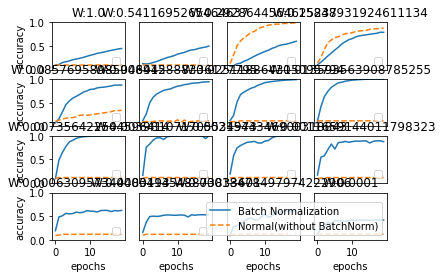

In [15]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

# Over-fitting

epoch:0, train acc:0.09, test acc:0.0767
epoch:1, train acc:0.11, test acc:0.095
epoch:2, train acc:0.11333333333333333, test acc:0.105
epoch:3, train acc:0.14, test acc:0.1221
epoch:4, train acc:0.20333333333333334, test acc:0.1595
epoch:5, train acc:0.25333333333333335, test acc:0.1861
epoch:6, train acc:0.31, test acc:0.2158
epoch:7, train acc:0.3233333333333333, test acc:0.2264
epoch:8, train acc:0.37666666666666665, test acc:0.2574
epoch:9, train acc:0.4033333333333333, test acc:0.2747
epoch:10, train acc:0.41, test acc:0.2903
epoch:11, train acc:0.43333333333333335, test acc:0.3081
epoch:12, train acc:0.45, test acc:0.3154
epoch:13, train acc:0.47, test acc:0.326
epoch:14, train acc:0.4633333333333333, test acc:0.3276
epoch:15, train acc:0.5, test acc:0.3467
epoch:16, train acc:0.5233333333333333, test acc:0.3602
epoch:17, train acc:0.5033333333333333, test acc:0.3599
epoch:18, train acc:0.55, test acc:0.3864
epoch:19, train acc:0.5766666666666667, test acc:0.3932
epoch:20, train

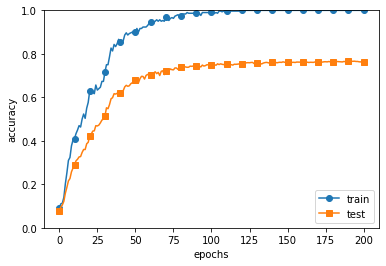

In [19]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
#weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## L2 Regularization

epoch:0, train acc:0.09666666666666666, test acc:0.0958
epoch:1, train acc:0.09666666666666666, test acc:0.0957
epoch:2, train acc:0.09666666666666666, test acc:0.0958
epoch:3, train acc:0.09666666666666666, test acc:0.0968
epoch:4, train acc:0.1, test acc:0.0983
epoch:5, train acc:0.10333333333333333, test acc:0.1
epoch:6, train acc:0.11, test acc:0.1027
epoch:7, train acc:0.15666666666666668, test acc:0.1106
epoch:8, train acc:0.18333333333333332, test acc:0.1195
epoch:9, train acc:0.20333333333333334, test acc:0.1291
epoch:10, train acc:0.23333333333333334, test acc:0.1421
epoch:11, train acc:0.25333333333333335, test acc:0.1589
epoch:12, train acc:0.31, test acc:0.1781
epoch:13, train acc:0.3233333333333333, test acc:0.1914
epoch:14, train acc:0.35, test acc:0.208
epoch:15, train acc:0.37, test acc:0.2236
epoch:16, train acc:0.37, test acc:0.2293
epoch:17, train acc:0.38, test acc:0.2364
epoch:18, train acc:0.39666666666666667, test acc:0.2473
epoch:19, train acc:0.42, test acc:0.2

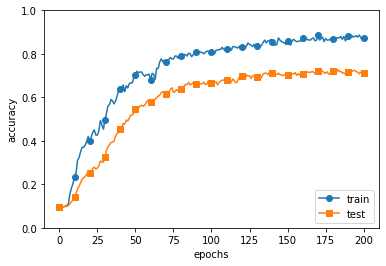

In [17]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## Dropout

train loss:2.3245504028504254
=== epoch:1, train acc:0.11, test acc:0.0902 ===
train loss:2.301527565234391
train loss:2.30009689408414
train loss:2.2986810361655325
=== epoch:2, train acc:0.10666666666666667, test acc:0.0919 ===
train loss:2.2903269396398653
train loss:2.30376314826141
train loss:2.2863835033025874
=== epoch:3, train acc:0.11666666666666667, test acc:0.0945 ===
train loss:2.2889439086332244
train loss:2.3079211275549345
train loss:2.276964732551632
=== epoch:4, train acc:0.12333333333333334, test acc:0.1007 ===
train loss:2.3084199327253674
train loss:2.297848086098719
train loss:2.299620840295159
=== epoch:5, train acc:0.13, test acc:0.1046 ===
train loss:2.2937363233845085
train loss:2.2959183109182995
train loss:2.2868569036889927
=== epoch:6, train acc:0.12666666666666668, test acc:0.1076 ===
train loss:2.2707182934934607
train loss:2.2645775914764683
train loss:2.3027522599303776
=== epoch:7, train acc:0.12666666666666668, test acc:0.1102 ===
train loss:2.2943655

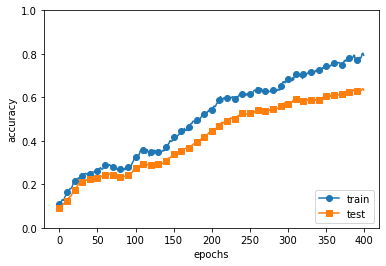

In [21]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=400, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# Hyper-parameter Tuning

val acc:0.11 | lr:0.00016128381058268793, weight decay:2.0751257034906255e-08
val acc:0.12 | lr:2.6657840586876583e-05, weight decay:1.0822908541189172e-08
val acc:0.72 | lr:0.0059301994382213, weight decay:7.018010433934659e-06
val acc:0.12 | lr:4.765395422940378e-05, weight decay:3.057619748696237e-06
val acc:0.1 | lr:2.0989409075738932e-05, weight decay:6.90758119419431e-08
val acc:0.11 | lr:2.3217485334585178e-05, weight decay:2.527323496251239e-06
val acc:0.08 | lr:1.6323245236351384e-05, weight decay:5.228129181666405e-06
val acc:0.07 | lr:0.0001820749693291941, weight decay:1.1745633088371606e-07
val acc:0.14 | lr:7.717936603977144e-05, weight decay:1.5741545751227566e-05
val acc:0.12 | lr:0.00014212712085422073, weight decay:1.9005426179938377e-05
val acc:0.12 | lr:0.000570332799752078, weight decay:6.17779391202854e-08
val acc:0.15 | lr:0.0009627155126334945, weight decay:5.980470071541876e-07
val acc:0.1 | lr:6.397835932146856e-05, weight decay:3.2886177265087095e-08
val acc:

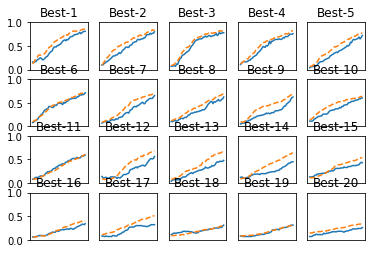

In [24]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()